# K-nearest Neighbour

First import all important libraries 

In [22]:
import numpy as np
import scipy.stats as ss
from collections import Counter
import random
import matplotlib.pyplot as plt

In [23]:
def distance(p1,p2):
    """ return distance between p1 and p2"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [24]:
def majority_votes(votes):
    """return value that occurs most times"""
    count_votes = Counter(votes)
    max_count = max(count_votes.values())
    winners = []
    for k,v in count_votes.items():
        if v == max_count:
            winners.append(k)
    return random.choice(winners)

In [25]:
def majority_votes_short(votes):
    """ faster and shorter version using scipy"""
    mode, count = ss.mstats.mod(votes)
    return mode

In [26]:
def find_nearest_neighbour(p, points, k):
    """ return indices of nearest neighbours"""
    distances = np.zeros(len(points))
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [27]:
def knn_predict(p, points, outcome, k):
    """ predict the class od point p"""
    ind = find_nearest_neighbour(p, points, k)
    return majority_votes(outcome[ind])

In [28]:
def gen_syn_data(n=50):
    """"generate synthetic data"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))))
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [29]:
def make_prediction_grid(predictor,outcome,limits,h,k):
    """Make a grid for plotting points"""
    x_min,x_max, y_min,y_max = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs,ys)
    
    prediction_t = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            prediction_t[j,i]= knn_predict(np.array([x,y]), predictor, outcome, k)
    
    return (xx,yy, prediction_t)

In [30]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

<ipython-input-30-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


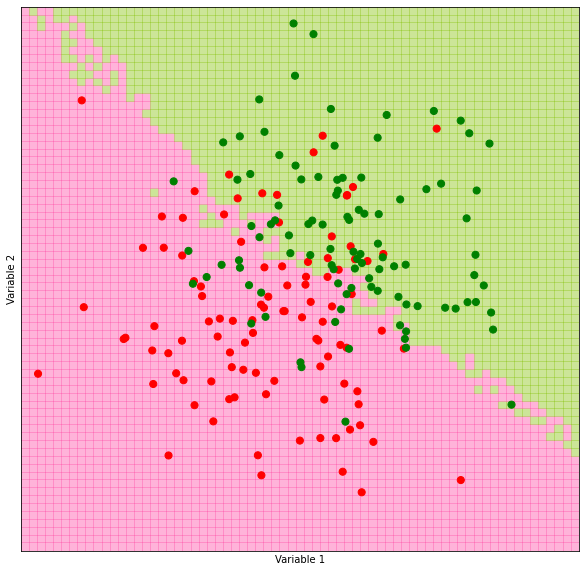

In [36]:
predictor, outcome = gen_syn_data()
limits = (-3,4,-3,4)
h = 0.1
k = 30
xx,yy,prediction_grid = make_prediction_grid(predictor,outcome,limits,h,k)
plot_prediction_grid (xx, yy, prediction_grid, 'KNN_30')